# Machine Learning Assesstment 1 Experiment 5
## K Nearest Neighbors



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from scipy.stats import f_oneway

### 1.   Load Dataset

In [3]:
train = pd.read_csv('/Users/ronikj/Downloads/salary_training.csv')

In [4]:
train.head()

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,...,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.80,2009,84.00,6920,1,B.Tech/B.E.,instrumentation and control engineering,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,2010,64.50,6624,2,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,2007,85.17,9084,2,B.Tech/B.E.,electronics & telecommunications,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,2009,86.00,8195,1,B.Tech/B.E.,computer science & engineering,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,2008,75.00,4889,2,B.Tech/B.E.,biotechnology,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
train.shape

(2998, 31)

### 2. Explore Dataset

This step will be skipped as data exploration has been performed in Experiment 1.

### 3. Explore Target variable

In [6]:
target = train['salary']

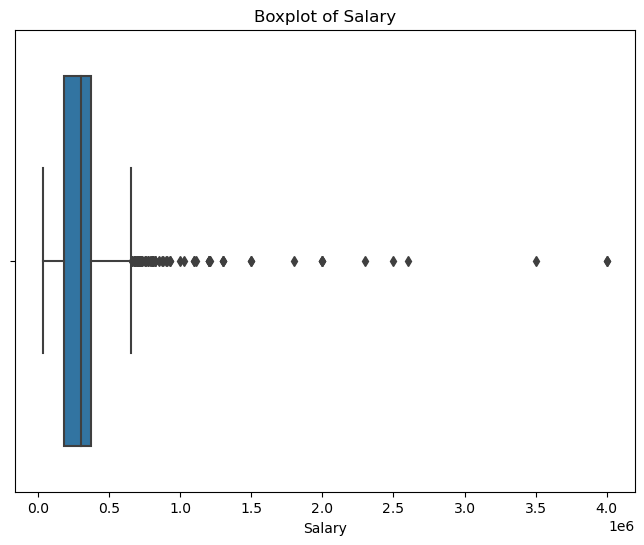

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=target)
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

### 4. Explore Variables of Interest

In [10]:
train['dob'] = pd.to_datetime(train['dob'])
current_year = datetime.now()
train['dob'] = current_year.year - train['dob'].dt.year
train.rename(columns={'dob': 'age'}, inplace=True)

In [11]:
train_num = train[['quant', 'logical', '10percentage', 'english', 'collegetier', '12percentage',
                            'computerprogramming', 'domain', 'age', 'salary']]

train_num.head()

,quant,logical,10percentage,english,collegetier,12percentage,computerprogramming,domain,age,salary
0,810,665,87.80,650,1,84.00,485,0.694479,34,445000
1,210,435,57.00,440,2,64.50,365,0.342315,34,110000
2,505,475,77.33,485,2,85.17,-1,0.824666,35,255000
3,635,620,84.30,675,1,86.00,655,0.990009,33,420000
4,365,495,82.00,575,2,75.00,315,0.278457,34,200000


In [12]:
train_cat = train['specialization']
train_cat.head()

0    instrumentation and control engineering
1             computer science & engineering
2           electronics & telecommunications
3             computer science & engineering
4                              biotechnology
Name: specialization, dtype: object

### 5. Prepare Data

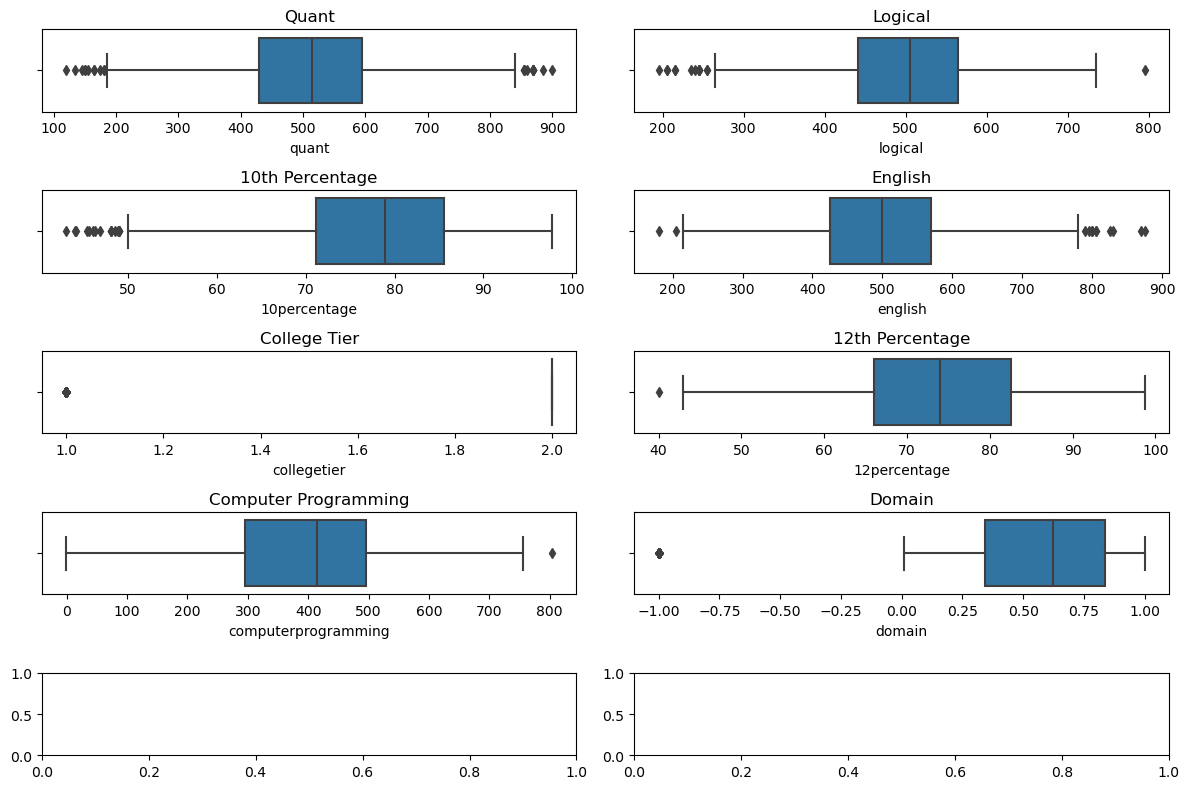

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8))

sns.boxplot(x=train_num['quant'], ax=axes[0, 0])
axes[0, 0].set_title('Quant')

sns.boxplot(x=train_num['logical'], ax=axes[0, 1])
axes[0, 1].set_title('Logical')

sns.boxplot(x=train_num['10percentage'], ax=axes[1, 0])
axes[1, 0].set_title('10th Percentage')

sns.boxplot(x=train_num['english'], ax=axes[1, 1])
axes[1, 1].set_title('English')

sns.boxplot(x=train_num['collegetier'], ax=axes[2, 0])
axes[2, 0].set_title('College Tier')

sns.boxplot(x=train_num['12percentage'], ax=axes[2, 1])
axes[2, 1].set_title('12th Percentage')

sns.boxplot(x=train_num['computerprogramming'], ax=axes[3, 0])
axes[3, 0].set_title('Computer Programming')

sns.boxplot(x=train_num['domain'], ax=axes[3, 1])
axes[3, 1].set_title('Domain')

sns.boxplot(x=train_num['age'], ax=axes[4, 0])
axes[4, 0].set_title('Age')

plt.tight_layout()
plt.show()

In [15]:
Q1 = train_num.quantile(0.25)
Q3 = train_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_num = train_num.clip(lower=lower_bound, upper=upper_bound, axis=1)

/var/folders/v6/v_b2mbgd09n8qd652j7jycg80000gn/T/ipykernel_34148/2430332408.py:8: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  train_num = train_num.clip(lower=lower_bound, upper=upper_bound, axis=1)


In [16]:
train_num.shape

(2998, 10)

In [17]:
indices = train_num[train_num['computerprogramming'] == -1].index

train_num.loc[indices, 'computerprogramming'] = np.nan

mean_value = train_num['computerprogramming'].mean()

train_num['computerprogramming'].fillna(mean_value, inplace=True)

train_num.shape

(2998, 10)

In [18]:
train_num.head()

,quant,logical,10percentage,english,collegetier,12percentage,computerprogramming,domain,age,salary
0,810.0,665.0,87.80,650.0,2,84.00,485.00000,0.694479,34.0,445000
1,210.0,435.0,57.00,440.0,2,64.50,365.00000,0.342315,34.0,110000
2,505.0,475.0,77.33,485.0,2,85.17,449.54983,0.824666,35.0,255000
3,635.0,620.0,84.30,675.0,2,86.00,655.00000,0.990009,33.0,420000
4,365.0,495.0,82.00,575.0,2,75.00,315.00000,0.278457,34.0,200000


In [19]:
label = LabelEncoder()

train_data_filtered = train[train.index.isin(train_num.index)]
train_num['specialization'] = label.fit_transform(train_data_filtered['specialization'])

In [20]:
train_num.head()

,quant,logical,10percentage,english,collegetier,12percentage,computerprogramming,domain,age,salary,specialization
0,810.0,665.0,87.80,650.0,2,84.00,485.00000,0.694479,34.0,445000,33
1,210.0,435.0,57.00,440.0,2,64.50,365.00000,0.342315,34.0,110000,12
2,505.0,475.0,77.33,485.0,2,85.17,449.54983,0.824666,35.0,255000,19
3,635.0,620.0,84.30,675.0,2,86.00,655.00000,0.990009,33.0,420000,12
4,365.0,495.0,82.00,575.0,2,75.00,315.00000,0.278457,34.0,200000,4


In [21]:
numeric_columns = train_num.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
train_num[numeric_columns] = scaler.fit_transform(train_num[numeric_columns])

train_num.head()

,quant,logical,10percentage,english,collegetier,12percentage,computerprogramming,domain,age,salary,specialization
0,2.432643,1.892646,1.016186,1.420185,0.0,0.868785,4.136420e-01,0.421884,0.249636,1.094253,1.497270
1,-2.500658,-0.754060,-2.076659,-0.581010,0.0,-0.885233,-9.865498e-01,-0.568227,0.249636,-1.328135,-0.810604
2,-0.075118,-0.293763,-0.035181,-0.152183,0.0,0.974026,-6.632640e-16,0.787905,0.827781,-0.279638,-0.041313
3,0.993763,1.374812,0.664726,1.658423,0.0,1.048685,2.397247e+00,1.252765,-0.328509,0.913478,-0.810604
4,-1.226222,-0.063615,0.433767,0.705472,0.0,0.059238,-1.569963e+00,-0.747762,0.249636,-0.677344,-1.689794


### 6. Split Dataset

In [33]:
X = train_num.drop(columns=['salary'])
y = train_num['salary'] 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (2098, 10)
X_test shape: (450, 10)
X_val shape: (450, 10)
y_train shape: (2098,)
y_test shape: (450,)
y_val shape: (450,)


### 7. Baseline Model

In [34]:
k = 5
baseline_model = KNeighborsRegressor(n_neighbors=k)
baseline_model.fit(X_train, y_train)

KNeighborsRegressor()

In [35]:
y_train_pred = baseline_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

In [36]:
y_pred = baseline_model.predict(X_val)
val_rmse = mean_squared_error(y_val, y_pred, squared=False)

In [37]:
model_train_perf = train_rmse.round(3)
model_valid_perf = val_rmse.round(3)

print("Root Mean Squared Error (RMSE) on Training Set:", model_train_perf)
print("Root Mean Squared Error (RMSE) on Validation Set:", model_valid_perf)

Root Mean Squared Error (RMSE) on Training Set: 0.782
Root Mean Squared Error (RMSE) on Validation Set: 0.992


We see a high amount of overfitting in the baseline model when the usual value of k=5 is implemented

### 8. Train Machine Learning Model

In [38]:
param_grid = {'n_neighbors': range(1, 50)}  # Try k values from 1 to 20

knn_model = KNeighborsRegressor()

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("Best value of k:", best_k)

Best value of k: 49


In [41]:
k = 49
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=49)

In [42]:
y_train_pred = knn_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

In [43]:
y_pred_val = knn_model.predict(X_val)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

In [44]:
y_pred_test = knn_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

### 9. Assess Model Performance

In [45]:
model_train_perf = train_rmse.round(3)
model_valid_perf = val_rmse.round(3)
model_test_perf = test_rmse.round(3)

print("Root Mean Squared Error (RMSE) on Training Set:", model_train_perf)
print("Root Mean Squared Error (RMSE) on Validation Set:", model_valid_perf)
print("Root Mean Squared Error (RMSE) for Testing Set:", model_test_perf)

Root Mean Squared Error (RMSE) on Training Set: 0.867
Root Mean Squared Error (RMSE) on Validation Set: 0.921
Root Mean Squared Error (RMSE) for Testing Set: 0.816


The KNN model has been trained for the specified features. Hyperparameter tuning has been performed to find the ideal value for K. 
We notice a high level of overfitting in using the KNN methodology. 
This indicates towards Linear regression being the better model in this particular case.